In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\edulo\OneDrive\Documentos\Loyalist\Term 2\Step Presentation - Project\SL Project\WLASL_videos\dataset_analysis.csv")


## ASL Data Set Analysis

In [3]:
df.head()

,Name,Sign,Length,Size(bytes),Type,FrameRate,Bitrate,Frames,Resolution
0,335,abdomen,2.3,82741,MP4,25.000000,285,58,"(320, 240)"
1,336,abdomen,2.2,481544,MP4,30.004616,1764,65,"(640, 480)"
2,338,abdomen,2.4,72695,MP4,29.970000,242,72,"(288, 192)"
3,339,abdomen,2.0,60415,MP4,29.970000,237,61,"(288, 192)"
4,341,abdomen,2.8,888854,MP4,30.331450,2568,84,"(720, 400)"


In [4]:
# Extracting Frame Width and Frame Height from Resolution column
df['Frame Width'] = df['Resolution'].str.extract(r'\((\d+),')
df['Frame Height'] = df['Resolution'].str.extract(r', (\d+)\)')

# Frame Width and Height need to be numerical and Name needs to be Categorical.
df['Frame Width'] = pd.to_numeric(df['Frame Width'])
df['Frame Height'] = pd.to_numeric(df['Frame Height'])
df['Name'] = df['Name'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11046 entries, 0 to 11045
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          11046 non-null  object 
 1   Sign          11046 non-null  object 
 2   Length        11046 non-null  float64
 3   Size(bytes)   11046 non-null  int64  
 4   Type          11046 non-null  object 
 5   FrameRate     11046 non-null  float64
 6   Bitrate       11046 non-null  int64  
 7   Frames        11046 non-null  int64  
 8   Resolution    11046 non-null  object 
 9   Frame Width   11046 non-null  int64  
 10  Frame Height  11046 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 949.4+ KB


In [5]:
# No Null values were found.
print('Null values :','\n',df.isnull().sum())

Null values : 
 Name            0
Sign            0
Length          0
Size(bytes)     0
Type            0
FrameRate       0
Bitrate         0
Frames          0
Resolution      0
Frame Width     0
Frame Height    0
dtype: int64


In [6]:
df.head()

,Name,Sign,Length,Size(bytes),Type,FrameRate,Bitrate,Frames,Resolution,Frame Width,Frame Height
0,335,abdomen,2.3,82741,MP4,25.000000,285,58,"(320, 240)",320,240
1,336,abdomen,2.2,481544,MP4,30.004616,1764,65,"(640, 480)",640,480
2,338,abdomen,2.4,72695,MP4,29.970000,242,72,"(288, 192)",288,192
3,339,abdomen,2.0,60415,MP4,29.970000,237,61,"(288, 192)",288,192
4,341,abdomen,2.8,888854,MP4,30.331450,2568,84,"(720, 400)",720,400


In [7]:
# DataFrame descriptive statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Length,11046.0,2.413697,0.965606,0.4,1.60,2.40,3.0,8.10
Size(bytes),11046.0,470582.832428,583352.383037,13800.0,70896.75,448266.50,686229.5,7700344.00
FrameRate,11046.0,28.954167,2.895145,12.0,29.97,29.97,30.0,59.94
Bitrate,11046.0,1547.513308,1759.173168,110.0,250.00,1637.00,2359.0,20744.00
Frames,11046.0,69.756563,27.496255,13.0,45.00,72.00,89.0,233.00
Frame Width,11046.0,766.335325,566.124569,288.0,320.00,640.00,736.0,1920.00
Frame Height,11046.0,466.784900,303.564780,180.0,192.00,400.00,480.0,1080.00


In [8]:
# Total of videos
print('Total of videos: ',len(df))

Total of videos:  11046


In [9]:
# Total of signs in the Data Frame
total_signs = df['Sign'].nunique()
print('Total of Signs in the Data Frame: ',total_signs)

Total of Signs in the Data Frame:  2000


In [10]:
#Total videos per sign
vidpersign = df['Sign'].value_counts()
print('Total videos per sign: \n\n',vidpersign)

Total videos per sign: 

 before        15
computer      14
thin          14
go            14
cool          14
              ..
grey           2
propaganda     2
battery        2
mention        1
wash face      1
Name: Sign, Length: 2000, dtype: int64


In [11]:
from tabulate import tabulate

# Empty list to store the results
results = []

# Iterate over the thresholds
for threshold in range(1, 16):
    # Count the number of signs reagrding the threshold
    total_signs = (vidpersign >= threshold).sum()
    
    # Append the results to the list
    results.append([f'>= {threshold}', total_signs])

# Display the results
print('Total of signs per quantity of videos:\n')
print(tabulate(results, headers=['No. of videos', 'Total Signs'], tablefmt='plain'))
print('\n Obs.: This information helps to understand how many signs would be learned by the model according to the minimal amount of videos necessary for training and testing. For example, if the model needs a minimum of 6 videos for training and testing, 867 signs would be learned by using this dataset.')

Total of signs per quantity of videos:

No. of videos      Total Signs
>= 1                      2000
>= 2                      1998
>= 3                      1975
>= 4                      1852
>= 5                      1415
>= 6                       867
>= 7                       462
>= 8                       252
>= 9                       118
>= 10                       53
>= 11                       25
>= 12                       14
>= 13                        9
>= 14                        5
>= 15                        1

 Obs.: This information helps to understand how many signs would be learned by the model according to the minimal amount of videos necessary for training and testing. For example, if the model needs a minimum of 6 videos for training and testing, 867 signs would be learned by using this dataset.


Text(0.5, 1.0, 'Distribution of Videos per Sign')

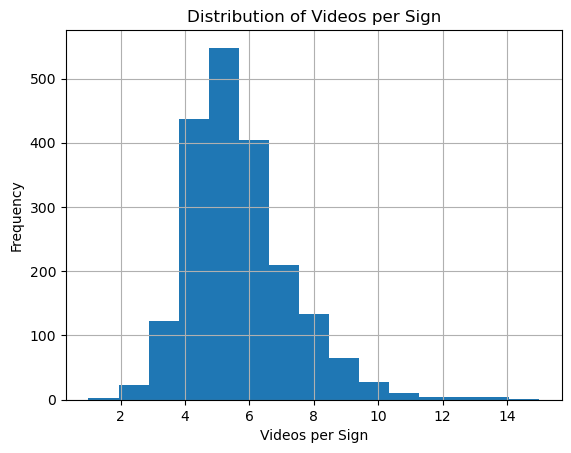

In [12]:
# Sign Frequency
df['Sign'].value_counts().hist(bins=15)
plt.xlabel('Videos per Sign')
plt.ylabel('Frequency')
plt.title('Distribution of Videos per Sign')

Correlation Matrix of Features:


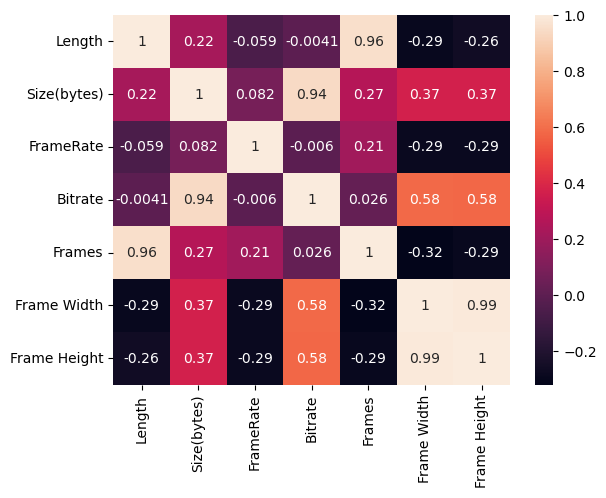

In [13]:
#Ploting the Correlation Matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
print('Correlation Matrix of Features:')

Text(0.5, 1.0, 'Video Length Distribution')

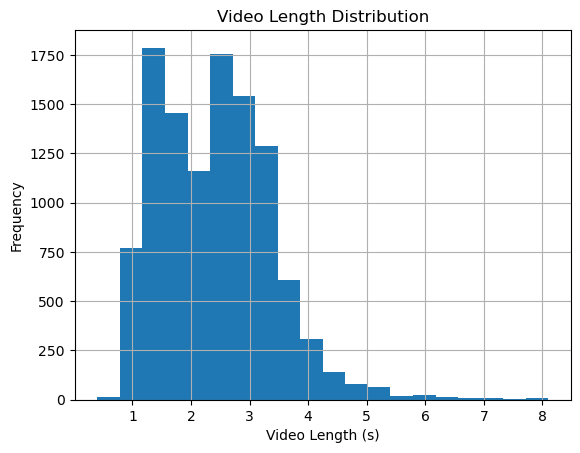

In [14]:
df['Length'].hist(bins=20)
plt.xlabel('Video Length (s)')
plt.ylabel('Frequency')
plt.title('Video Length Distribution')

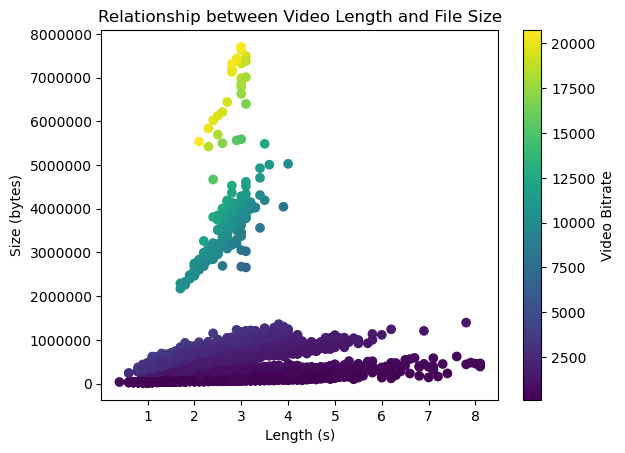

By plotting this chart, we can gain a better understanding of the relationship between video length, file size, and bitrate. We can visually identify areas in the plot where higher bitrate values correspond to certain video lengths and file sizes. This allows us to infer that videos with higher bitrates may indicate better quality.


In [15]:
import matplotlib.pyplot as plt

plt.ticklabel_format(style='plain')  # Disable scientific notation
plt.scatter(df['Length'], df['Size(bytes)'], c=df['Bitrate'])
plt.xlabel('Length (s)')
plt.ylabel('Size (bytes)')
plt.title('Relationship between Video Length and File Size')
plt.colorbar(label='Video Bitrate')  
plt.show()

print('By plotting this chart, we can gain a better understanding of the relationship between video length, file size, and bitrate. We can visually identify areas in the plot where higher bitrate values correspond to certain video lengths and file sizes. This allows us to infer that videos with higher bitrates may indicate better quality.')

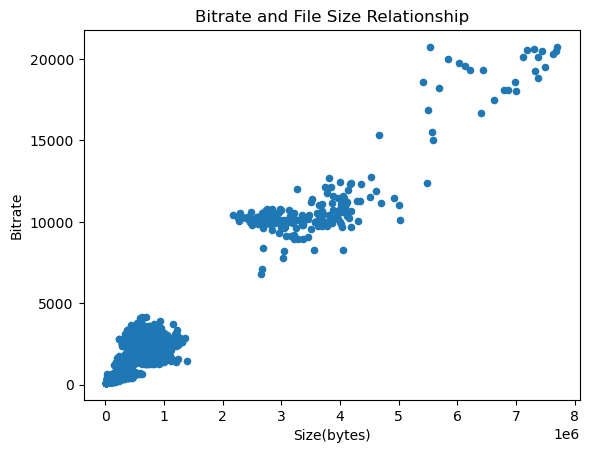

In [16]:
df.plot.scatter(x='Size(bytes)', y='Bitrate')
plt.title('Bitrate and File Size Relationship')
plt.show()

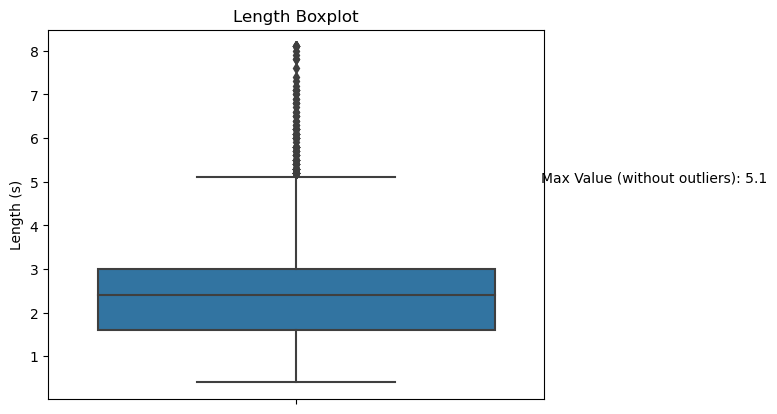

According to the boxplot chart, videos with a length above 5.1 seconds are considered outliers. By watching some of these videos, we noticed that there are signs that naturally take longer to perform. A better approach would be plotting boxplot for each sign.


In [17]:
import numpy as np
length_data = df['Length']
q3 = np.percentile(length_data, 75)
iqr = q3 - np.percentile(length_data, 25)
upper_whisker = q3 + 1.5 * iqr

plt.figure()
sns.boxplot(data=df, y='Length', fliersize=5)
plt.ylabel('Length (s)')
plt.title('Length Boxplot')

# Calculating the max value without outliers
#Source: https://seaborn.pydata.org/generated/seaborn.boxplot.html

max_value_no_outliers = length_data[length_data <= upper_whisker].max()
plt.text(0.95, max_value_no_outliers, f'Max Value (without outliers): {max_value_no_outliers}', ha='right', va='center')
plt.show()

print('According to the boxplot chart, videos with a length above 5.1 seconds are considered outliers. By watching some of these videos, we noticed that there are signs that naturally take longer to perform. A better approach would be plotting boxplot for each sign.')

Top 30 signs with more avaliable videos from dataset:


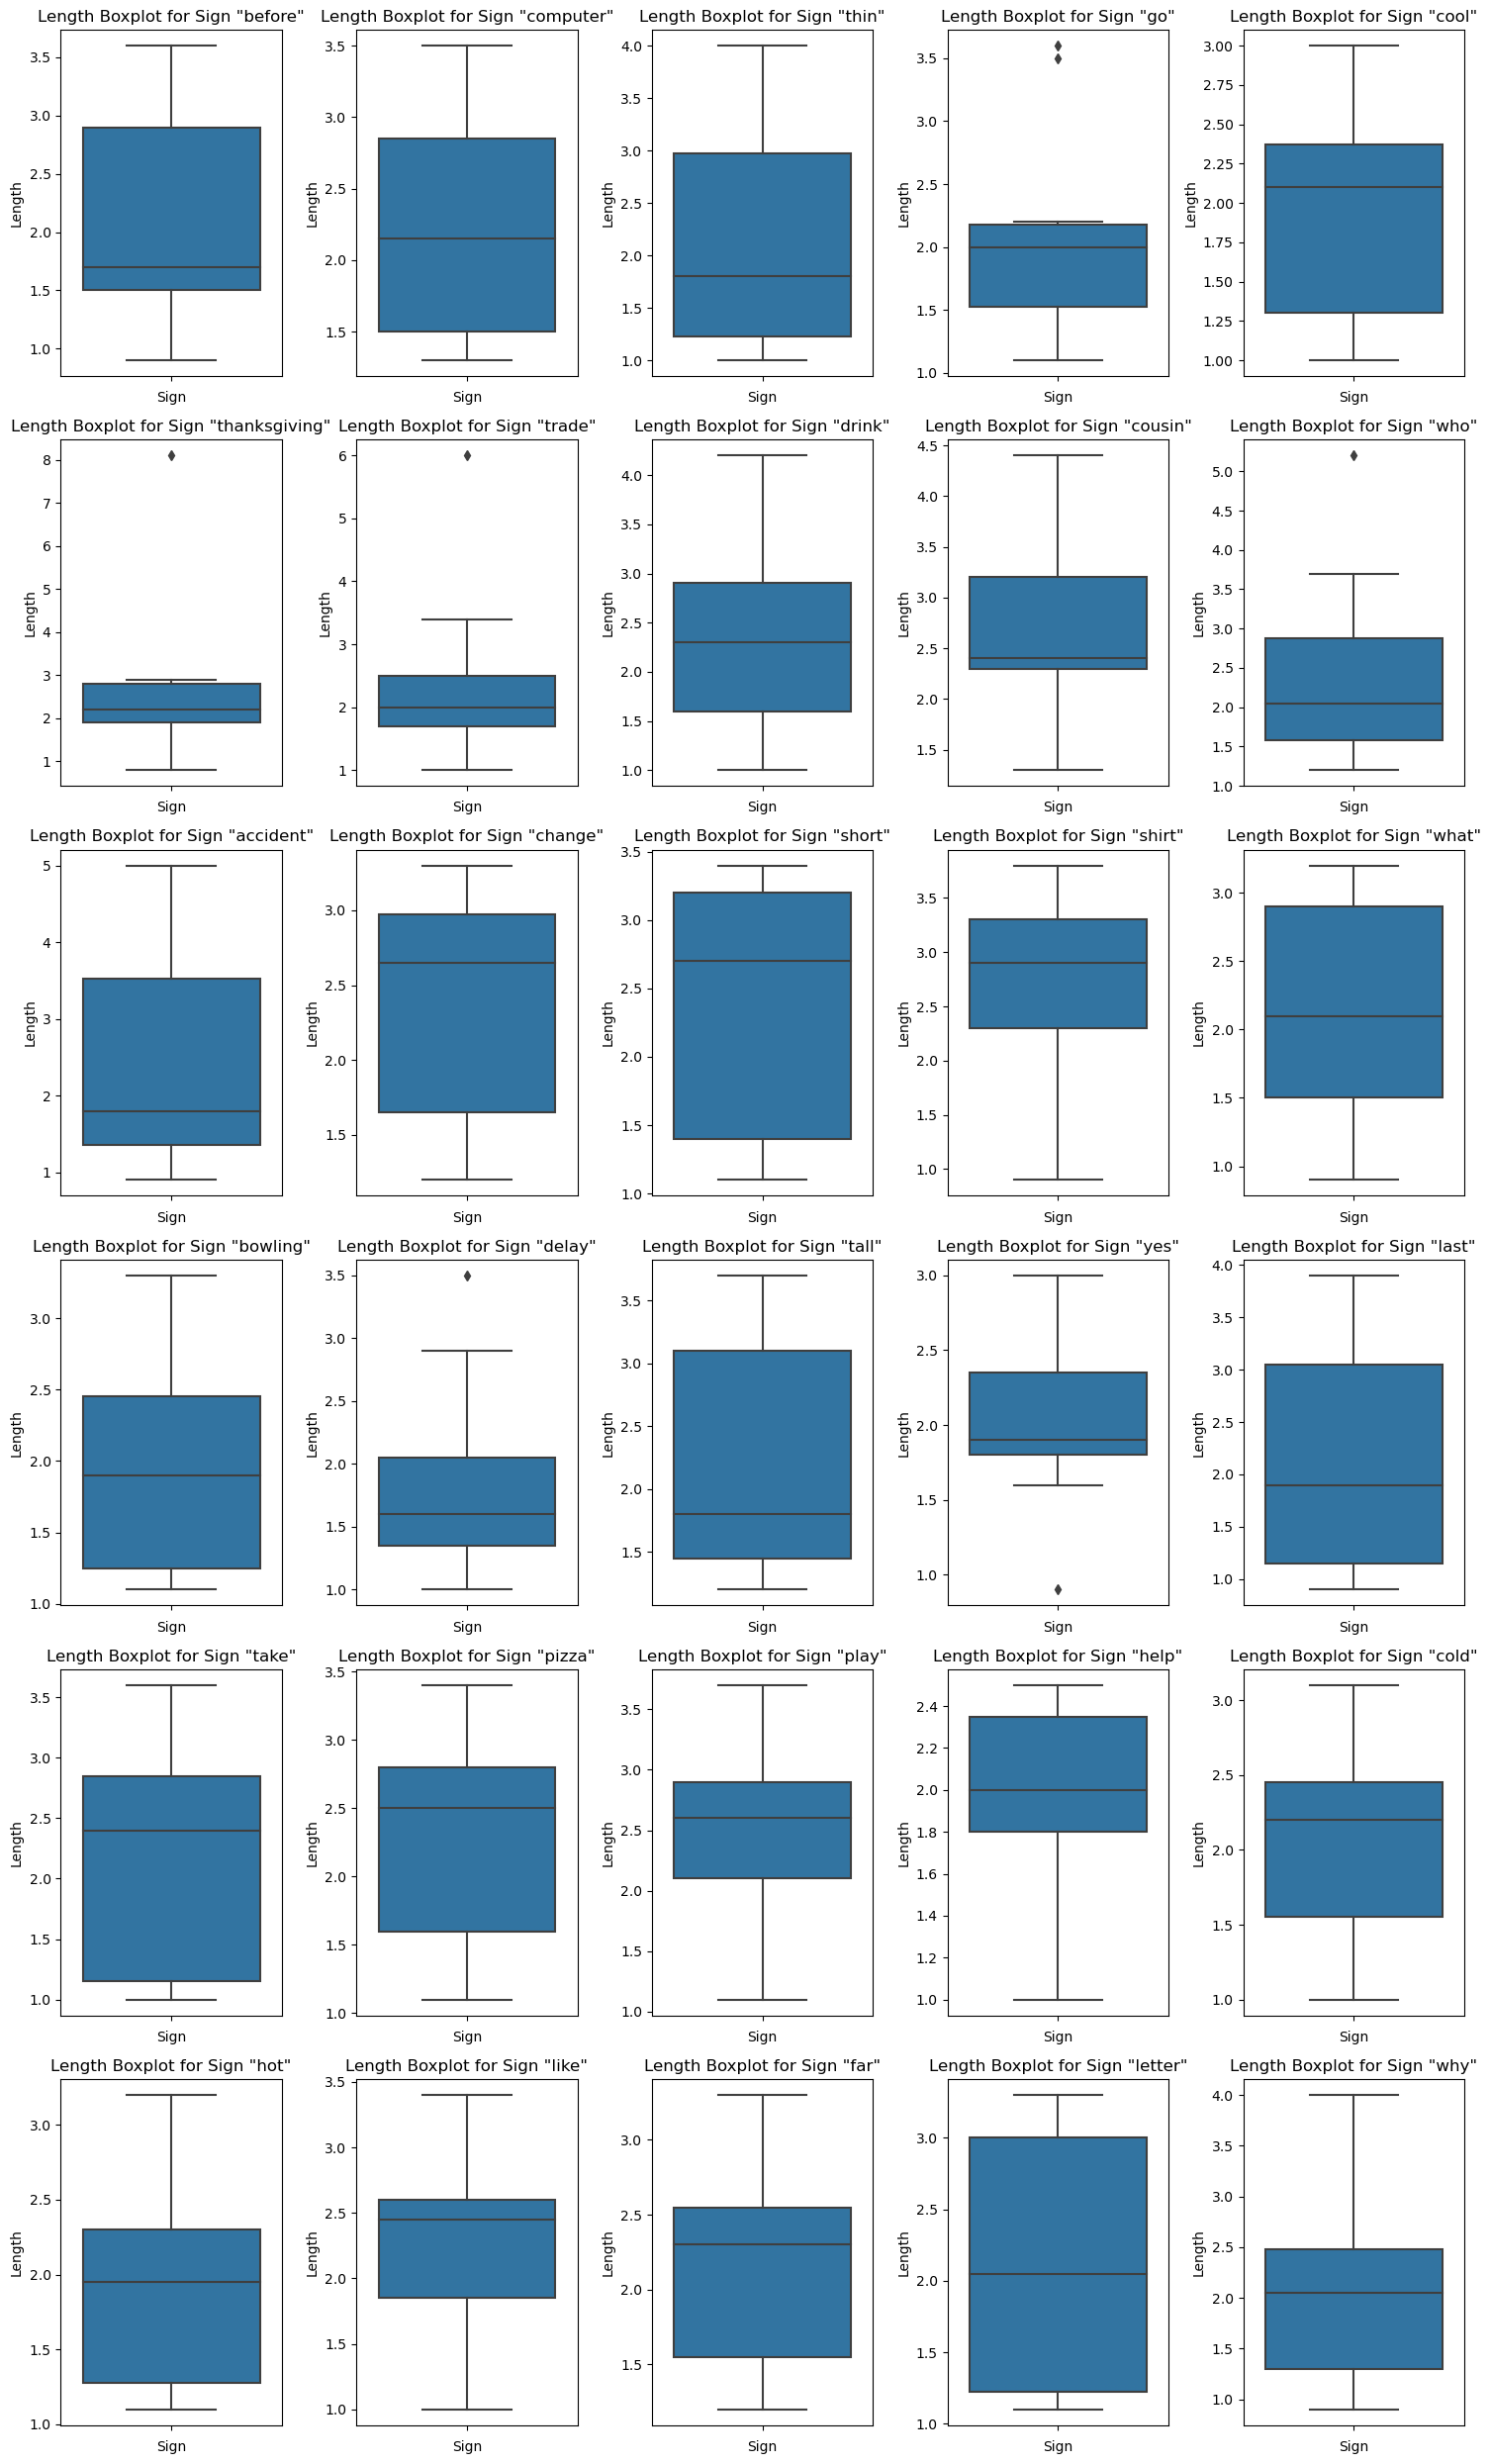

Using this approach is easier to identify the real outliers.


In [22]:
# Getting the top 30 signs with the most videos
top_signs = vidpersign.nlargest(30).index

# Ploting each sign
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 25))
axes = axes.flatten()

# Iterating over each sign and create a boxplot
for i, sign in enumerate(top_signs):
    sign_data = df[df['Sign'] == sign]
    
    # Creating boxplot
    sns.boxplot(data=sign_data, y='Length', ax=axes[i])
    axes[i].set_xlabel('Sign')
    axes[i].set_ylabel('Length')
    axes[i].set_title(f'Length Boxplot for Sign "{sign}"')
print('Top 30 signs with more avaliable videos from dataset:')
plt.tight_layout()
plt.show()
print('Using this approach is easier to identify the real outliers.')

In [18]:
# Identifying outliers
# Source: https://www.geeksforgeeks.org/finding-the-outlier-points-from-matplotlib/
# Source: https://onestopdataanalysis.com/python-outlier-detection/#:~:text=An%20outlier%20can%20be%20easily,bound%20is%20considered%20an%20outlier.

outlier_videos = []

# Iterating over each sign and identify the outlier videos
for sign in df['Sign'].unique()[:2000]:  # Consider the first 2000 unique signs
    sign_data = df[df['Sign'] == sign]
    
    # Calculating the upper and lower bounds for outliers
    q1 = sign_data['Length'].quantile(0.25)
    q3 = sign_data['Length'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Find the outlier videos
    outliers = sign_data[(sign_data['Length'] < lower_bound) | (sign_data['Length'] > upper_bound)]
    
    # Append the names of the outlier videos to the list
    outlier_videos.extend(outliers['Name'].tolist())

# Print the names of the outlier videos
print("Outlier Videos ID from the first 2000 signs:")
for video in outlier_videos:
    print(video)

# Print the total number of outliers
print("Total number of outliers:", len(outlier_videos))

Outlier Videos ID from the first 2000 signs:
341
584
891
1076
1383
1436
1477
1876
1988
2231
2429
2583
2589
69212
2910
3003
3005
3055
3068
3430
3571
3598
3756
4053
4102
4304
4378
4389
4393
4620
4824
5175
5280
5654
5784
5792
5796
5844
6069
6163
6334
6360
6736
7274
7458
7462
7966
8093
8180
8182
8339
8355
8448
8452
8472
8859
8937
9502
9627
9808
9810
10005
10008
10192
10296
10300
10412
10589
10605
10614
10646
10682
10892
11144
11145
11200
11286
11357
11419
11473
11972
12008
12016
12020
12023
12027
12223
12418
12602
12819
13018
13172
13174
13414
13543
13740
13799
13805
14287
14366
14370
14774
14799
14839
14845
14882
14981
15323
15723
15728
15753
15826
15899
16216
16319
16397
16809
17091
17149
17212
17400
17820
17897
17951
18037
18040
18061
18158
18241
18370
18429
18759
18979
19165
19169
19207
19406
19408
19654
19704
19857
19967
20235
20260
20622
20667
20978
21212
21395
21524
21526
21869
21878
21883
22134
22272
22276
22911
23652
23946
24119
24329
24892
24895
24940
24973
24989
25241
25321
2541

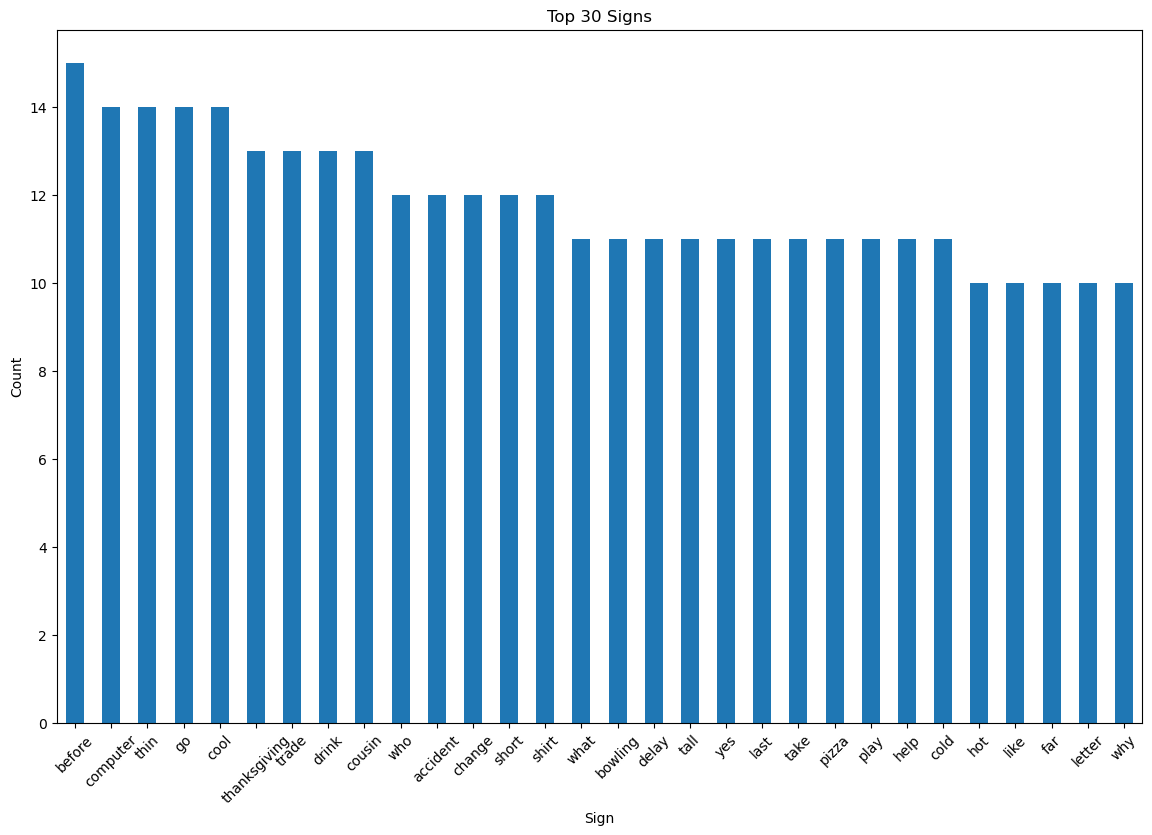

In [19]:
sign_counts = df['Sign'].value_counts()
top_signs = sign_counts.head(30)
plt.figure(figsize=(14, 9))
top_signs.plot(kind='bar')
plt.xlabel('Sign')
plt.ylabel('Count')
plt.title(f'Top 30 Signs')
plt.xticks(rotation=45)
plt.show()

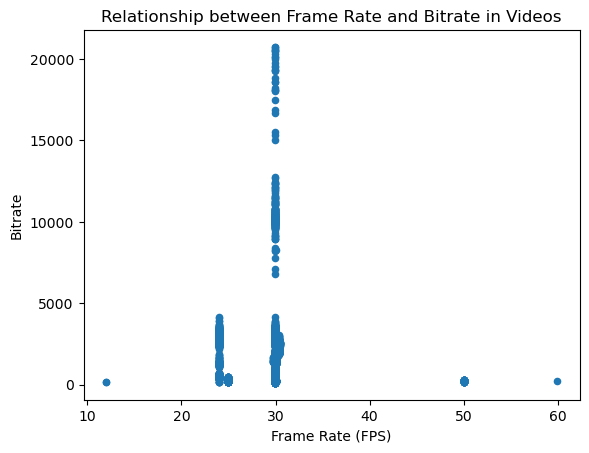

In [20]:
df.plot.scatter(x='FrameRate', y='Bitrate')
plt.title('Relationship between Frame Rate and Bitrate in Videos')
plt.xlabel('Frame Rate (FPS)')
plt.ylabel('Bitrate')
plt.show()

Pairwise Relationships of Numerical Features: 



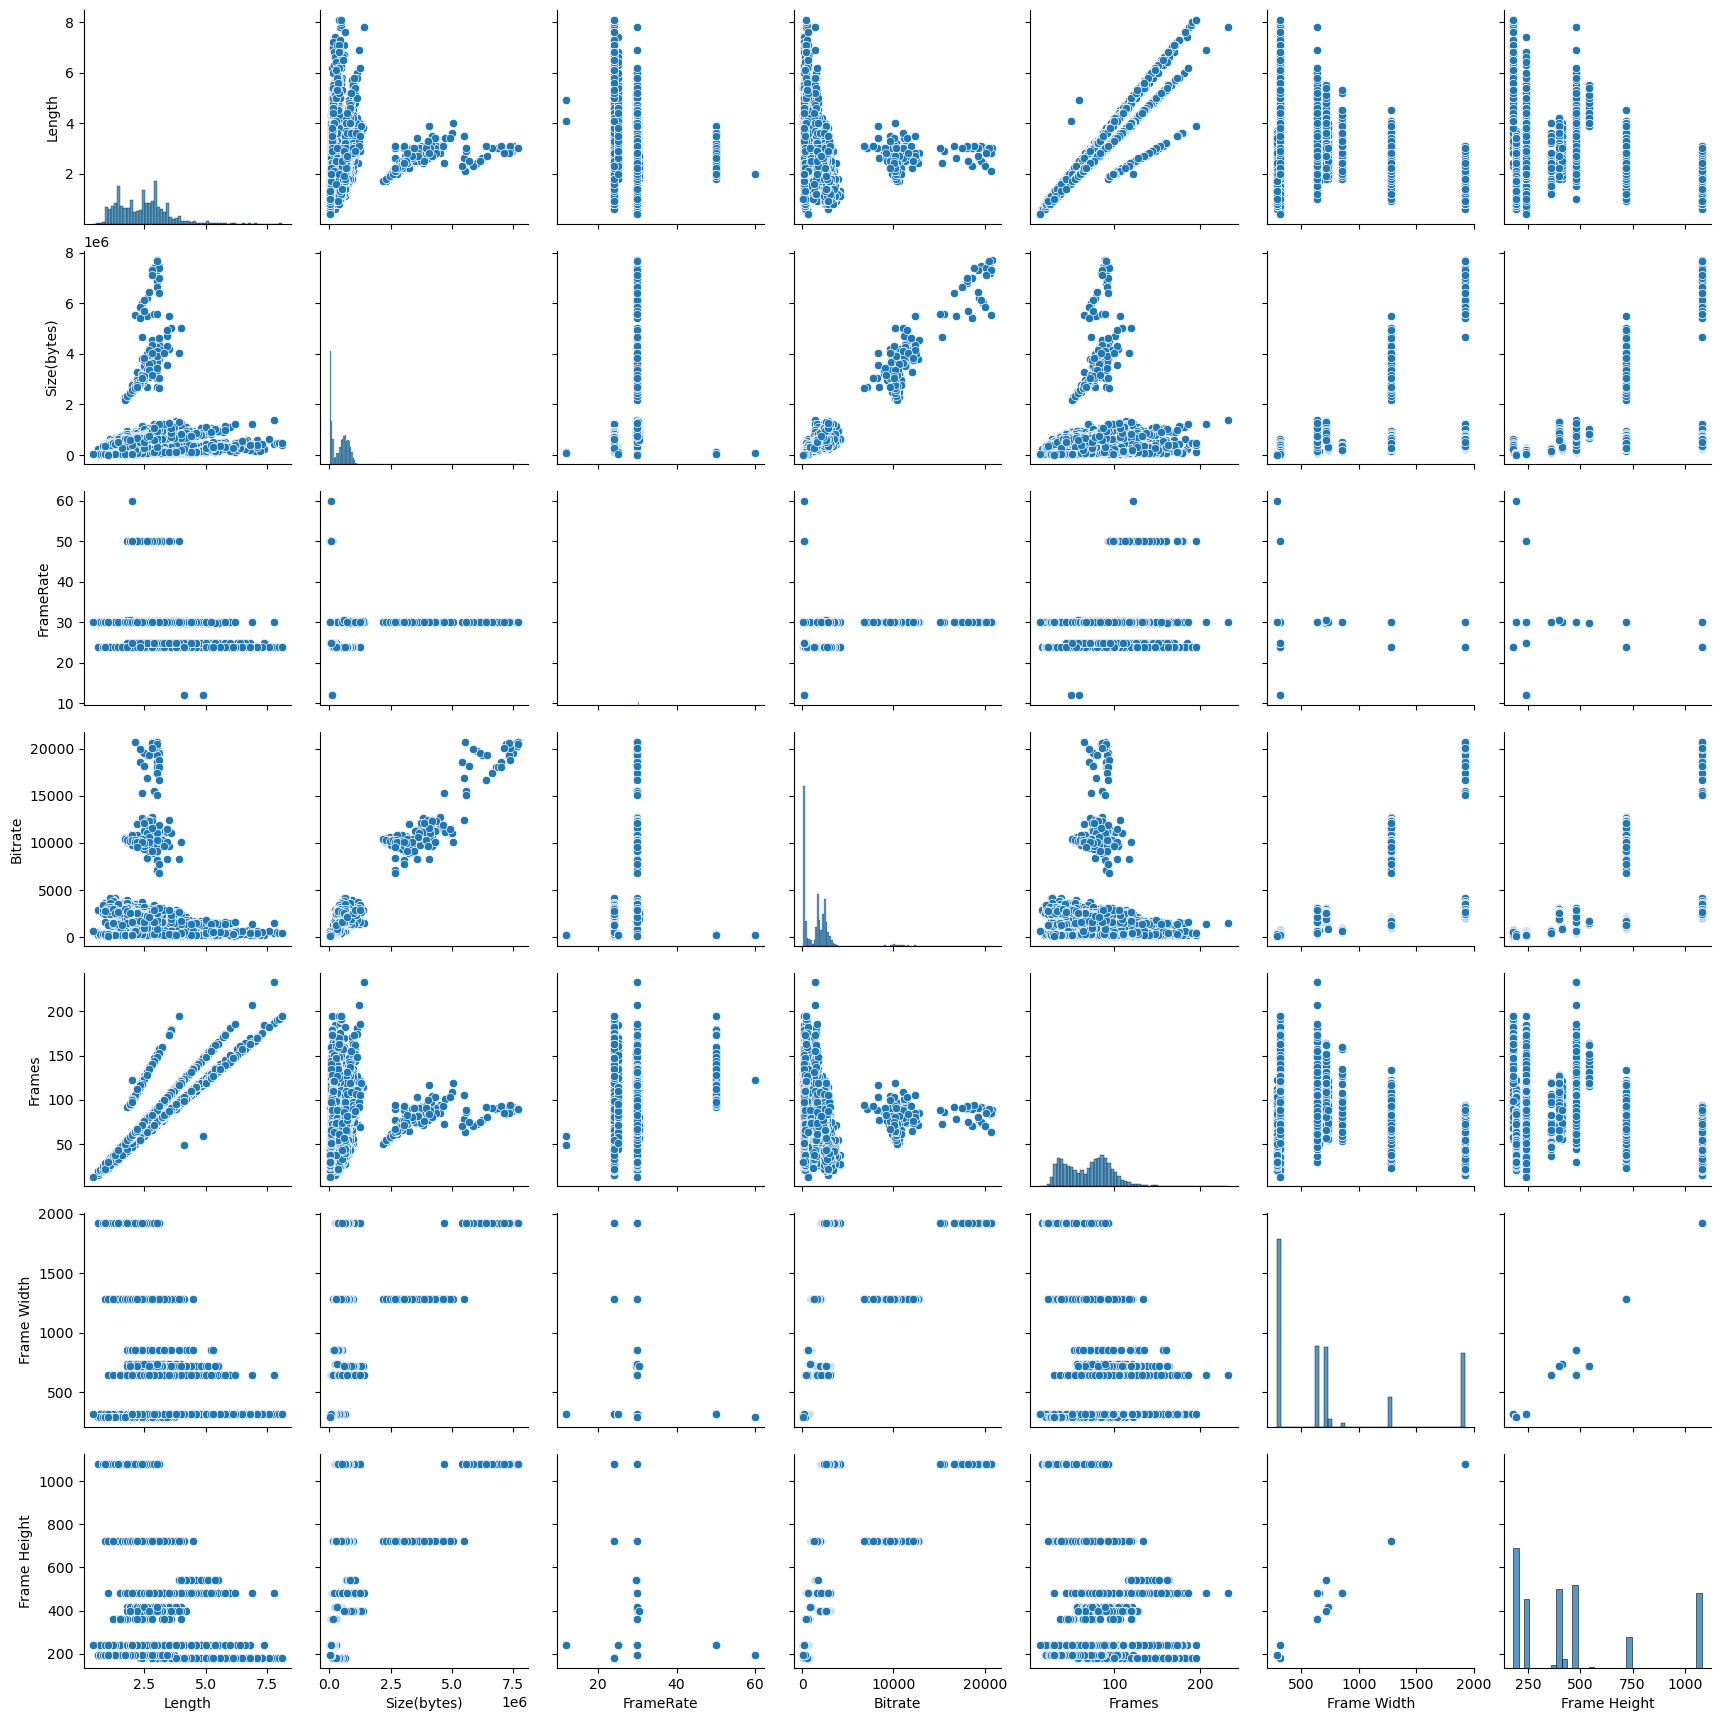

This chart shows pairwise relationships between numerical features in the dataset using scatter plots, providing a visual overview of their correlations and distributions.


In [21]:
numerical_features = ['Length', 'Size(bytes)', 'FrameRate', 'Bitrate', 'Frames', 'Frame Width', 'Frame Height']
sns.pairplot(df[numerical_features])
print('Pairwise Relationships of Numerical Features: \n')
plt.show()
print("This chart shows pairwise relationships between numerical features in the dataset using scatter plots, providing a visual overview of their correlations and distributions.")

## Outliers Analysis

In [22]:
df_no_outliers = df.copy()
df_no_outliers = df_no_outliers[~df_no_outliers['Name'].isin(outlier_videos)]

In [23]:
df_no_outliers.head()

,Name,Sign,Length,Size(bytes),Type,FrameRate,Bitrate,Frames,Resolution,Frame Width,Frame Height
0,335,abdomen,2.3,82741,MP4,25.000000,285,58,"(320, 240)",320,240
1,336,abdomen,2.2,481544,MP4,30.004616,1764,65,"(640, 480)",640,480
2,338,abdomen,2.4,72695,MP4,29.970000,242,72,"(288, 192)",288,192
3,339,abdomen,2.0,60415,MP4,29.970000,237,61,"(288, 192)",288,192
5,376,able,2.2,81238,MP4,25.000000,290,56,"(320, 240)",320,240


In [24]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10634 entries, 0 to 11045
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          10634 non-null  object 
 1   Sign          10634 non-null  object 
 2   Length        10634 non-null  float64
 3   Size(bytes)   10634 non-null  int64  
 4   Type          10634 non-null  object 
 5   FrameRate     10634 non-null  float64
 6   Bitrate       10634 non-null  int64  
 7   Frames        10634 non-null  int64  
 8   Resolution    10634 non-null  object 
 9   Frame Width   10634 non-null  int64  
 10  Frame Height  10634 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 996.9+ KB


In [25]:
df_no_outliers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Length,10634.0,2.383854,0.896673,0.4,1.60,2.40,3.0,8.10
Size(bytes),10634.0,475604.446869,586312.810933,13800.0,72164.25,458187.00,688432.0,7700344.00
FrameRate,10634.0,28.991235,2.895754,12.0,29.97,29.97,30.0,59.94
Bitrate,10634.0,1573.323585,1769.219270,110.0,250.00,1660.00,2368.0,20744.00
Frames,10634.0,69.129302,26.290639,13.0,45.00,72.00,88.0,233.00
Frame Width,10634.0,775.827534,567.993946,288.0,320.00,640.00,736.0,1920.00
Frame Height,10634.0,472.142374,304.184340,180.0,240.00,400.00,480.0,1080.00


In [26]:
# Total of signs in the Data Frame
total_signs1 = df_no_outliers['Sign'].nunique()
print('Total of Signs in the Data Frame: ',total_signs1)

Total of Signs in the Data Frame:  2000


In [27]:
#Total videos per sign
vidpersign1 = df_no_outliers['Sign'].value_counts()
print('Total videos per sign: \n\n',vidpersign1)


Total videos per sign: 

 before        15
thin          14
computer      14
cool          14
drink         13
              ..
ski            2
propaganda     2
excuse         2
mention        1
wash face      1
Name: Sign, Length: 2000, dtype: int64


In [30]:
# Empty list to store the results
results1 = []

# Iterate over the thresholds
for threshold1 in range(1, 16):
    # Count the number of signs with more than or equal to the specified threshold
    total_signs1 = (vidpersign1 >= threshold1).sum()
    
    # Append the results to the list
    results1.append([f'>= {threshold1}', total_signs1])

# Display the results in a compact grid
print('Total of signs per quantity of videos:\n')
print(tabulate(results1, headers=['No. of videos', 'Total Signs'], tablefmt='plain'))

Total of signs per quantity of videos:

No. of videos      Total Signs
>= 1                      2000
>= 2                      1998
>= 3                      1975
>= 4                      1734
>= 5                      1295
>= 6                       797
>= 7                       417
>= 8                       220
>= 9                       102
>= 10                       49
>= 11                       23
>= 12                       13
>= 13                        6
>= 14                        4
>= 15                        1


Text(0.5, 1.0, 'Distribution of Videos per Sign')

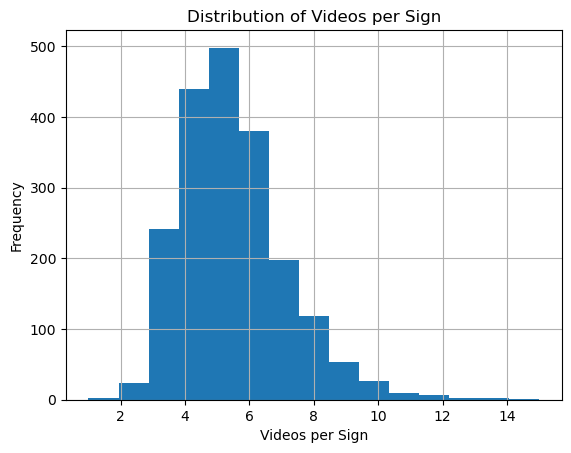

In [28]:
# Sign Frequency
df_no_outliers['Sign'].value_counts().hist(bins=15)
plt.xlabel('Videos per Sign')
plt.ylabel('Frequency')
plt.title('Distribution of Videos per Sign')